# Price Prediction for second hand cars in Germant

## Steps of the Project:
## TODO: clean below steps
1-EDA (Exploratory Data Analysis)

2-Feature Engineering

3-Data Preprocessing

4-Modeling 

  4-1-Model Selection
  
  4-2-Model Evaluation
  
  4-3-Model Tuning

5-Visualization 

4- Results 

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

## 1-EDA (Exploratory Data Analysis)

The data set is cleaned in eda.ipynb and stored in final_car_data.csv. 

In [2]:
selected_df = pd.read_csv('final_car_data.csv')

In [3]:
selected_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
120791,2023,28788,81.0,5.0,0
120792,2023,28420,81.0,4900.0,0
120793,2023,59990,110.0,10500.0,0
120794,2023,30370,152.0,10.0,0


In [4]:
selected_df.describe

<bound method NDFrame.describe of         year  price  power_kw  mileage_in_km  brand
0       2011   9900     103.0       119000.0      2
1       2011   9290     118.0       184574.0      2
2       2011   9499      77.0       114860.0      2
3       2011  11990     103.0       205013.0      2
4       2011  10900     150.0       192350.0      2
...      ...    ...       ...            ...    ...
120791  2023  28788      81.0            5.0      0
120792  2023  28420      81.0         4900.0      0
120793  2023  59990     110.0        10500.0      0
120794  2023  30370     152.0           10.0      0
120795  2023  69990     110.0          501.0      0

[120796 rows x 5 columns]>

## 2-Modeling 

### 2-0-Splitting the Data Set

In [5]:
# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = selected_df.drop(columns='price').values  # Assuming 'price' is the target variable
y = selected_df['price'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.0180e+03 2.0000e+02 4.9485e+04 2.0000e+00]
 [2.0130e+03 1.2500e+02 2.0100e+05 1.0000e+00]
 [2.0180e+03 4.1000e+02 2.3000e+04 1.0000e+00]
 ...
 [2.0140e+03 8.1000e+01 2.6200e+04 0.0000e+00]
 [2.0110e+03 2.6000e+02 9.4000e+04 2.0000e+00]
 [2.0230e+03 1.1000e+02 1.0000e+01 2.0000e+00]]
[[2.0180e+03 1.1000e+02 7.7374e+04 0.0000e+00]
 [2.0160e+03 1.3500e+02 7.0000e+04 4.0000e+00]
 [2.0190e+03 7.4000e+01 2.5601e+04 5.0000e+00]
 ...
 [2.0190e+03 2.1000e+02 1.0840e+05 2.0000e+00]
 [2.0190e+03 1.1000e+02 3.1317e+04 6.0000e+00]
 [2.0150e+03 1.5000e+02 1.3500e+05 0.0000e+00]]
[ 34950  14985 126941 ...  14999  29900  46778]
[18888 19500 19290 ... 60000 28950  8499]


### 2-1-Linear Regression

In [35]:
%run regression.ipynb
out = linear_reg(X_train, y_train, X_test,y_test)
print('output= ', out)
y_pred = out[2]
print('predicted values= ', y_pred)

output=  (-3761964.0872479007, array([ 1.86848541e+03,  1.96336668e+02, -4.86696282e-02, -1.07220769e+03]), array([26470.73423249, 23712.23918066, 18429.83379991, ...,
       44318.4471451 , 24147.55055158, 25914.10872634]), 56.42873482924582, 6691.8046009458785, 180910073.38468328, 13450.28153551751)
predicted values=  [26470.73423249 23712.23918066 18429.83379991 ... 44318.4471451
 24147.55055158 25914.10872634]


Text(0, 0.5, 'y_pred')

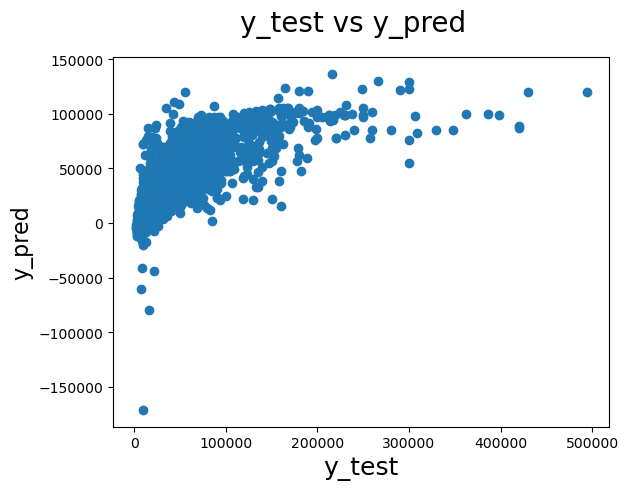

In [36]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

#### Conclusion

The dataset was highly scrapped and also is very diverse and the features given do not competely describe the listings. Therefore, the result seems satisfactory, although not highly applicable

 ###  2-2-Decision Tree

In [28]:
print(len(X_train))

96636


In [30]:
%run Decision_Tree.ipynb

#Measuring Execution Time
start_time = time.time()

dc_tree = decision_tree(X_train, y_train, X_test,y_test)

end_time = time.time()
execution_time = end_time - start_time

y_pred = dc_tree[0]
print("y_pred ", y_pred)
print("Accuracy: ", dc_tree[1])
print('Exection Time: ', execution_time)

y_pred  [21945 24980 19490 ... 43800 26930 42900]
Accuracy:  0.036051324503311256
Exection Time:  44.65681576728821


#### Note.
1-Decision tree took 45-60 sec (in several runs), while regression takes very short time. 

2-The accuracy is quite low; ~36% without parameters, ~11% with entropy and max_depth=3 (increasing max_depth slightly increases the accuracy). This is expected because of the diversity of the data as well as noise in the data.

#### Note. 
Plotting Decision tree either as below or as as in the Decision_Tree.ipynb causes kernel fail and restart; This should be because of the large size of the decision tree.

Text(0, 0.5, 'y_pred')

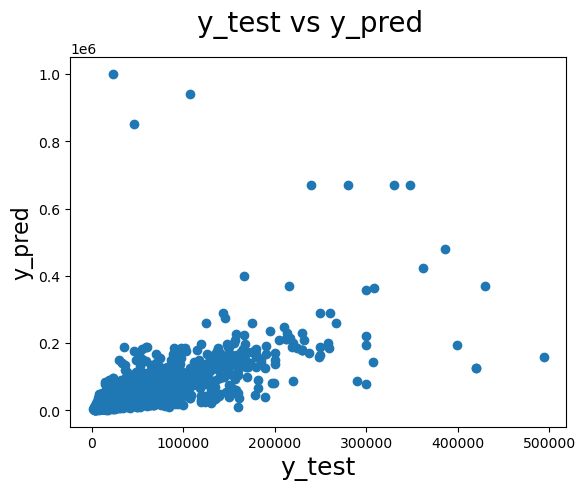

In [31]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [9]:
#features = ['year', 'power_kw', 'mileage_in_km', 'brand']
#tree_plot = tree.plot_tree(dtree, feature_names = features)

### 2-3-Boosting

In [12]:
#### TODO: Fix below

In [26]:
%run boosting.ipynb
boosting(X_train, y_train, X_test, y_test)

test


XGBoostError: [12:00:00] /workspace/src/data/data.cc:501: Check failed: this->labels.Size() % this->num_row_ == 0 (4 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) /home/rahkooy/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x3588ca) [0x7f20759438ca]
  [bt] (1) /home/rahkooy/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x389af7) [0x7f2075974af7]
  [bt] (2) /home/rahkooy/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x38ab51) [0x7f2075975b51]
  [bt] (3) /home/rahkooy/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xb0) [0x7f20757493a0]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7f212fc3ce2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7f212fc39493]
  [bt] (6) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7f212fc4c3e9]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x7f212fc4ba00]
  [bt] (8) /usr/bin/python3(_PyObject_MakeTpCall+0x25b) [0x55ba319bda7b]



### 2-3-KNN

#### TODO (for E)
0- clean the cells in this section. you have repeated everything.

1-clean knn.ipynb and write a function to compute knn (check regression.ipynb as an example)

2-execute the function here and check the errors, etc.

3-do plotting here not in the knn.ipybn

4-write a conclusion/explanation of the errors, plots, etc.

In [27]:
%run KNN.ipynb

   year  price  power_kw  mileage_in_km  brand
0  2011   9900     103.0       119000.0      2
1  2011   9290     118.0       184574.0      2
2  2011   9499      77.0       114860.0      2
3  2011  11990     103.0       205013.0      2
4  2011  10900     150.0       192350.0      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120796 entries, 0 to 120795
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           120796 non-null  int64  
 1   price          120796 non-null  int64  
 2   power_kw       120796 non-null  float64
 3   mileage_in_km  120796 non-null  float64
 4   brand          120796 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.6 MB
None


KeyError: "['fuel_consumption_g_km'] not found in axis"

KeyError: "['fuel_consumption_g_km'] not found in axis"

In [41]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

In [42]:
knn.fit(X_train,y_train)

ValueError: could not convert string to float: '148 g/km'

In [43]:
#Testing the KNN model
# Predictions on the testing set
knn_predictions = knn.predict(X_test)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [44]:
# Evaluating the KNN model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
# Accuracy score
knn_accuracy = accuracy_score(y_test)

TypeError: missing a required argument: 'y_pred'

In [46]:
_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, knn_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))

SyntaxError: unmatched ')' (3760450141.py, line 1)

###  2-4-Random Forest
  

#### TODO. Do the same cleaning as in KNN

In [29]:
%run Random_Forest.ipynb

   year  price  power_kw  mileage_in_km  brand
0  2011   9900     103.0       119000.0      2
1  2011   9290     118.0       184574.0      2
2  2011   9499      77.0       114860.0      2
3  2011  11990     103.0       205013.0      2
4  2011  10900     150.0       192350.0      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120796 entries, 0 to 120795
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           120796 non-null  int64  
 1   price          120796 non-null  int64  
 2   power_kw       120796 non-null  float64
 3   mileage_in_km  120796 non-null  float64
 4   brand          120796 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.6 MB
None


KeyError: "['fuel_consumption_g_km'] not found in axis"

KeyError: "['fuel_consumption_g_km'] not found in axis"

In [ ]:
# Training the random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
rf.fit(X_train, y_train)


# Testing the Random Forest model
# Predictions on the testing set
rf_predictions = rf.predict(X_test)

# Evaluating the Random Forest model
# Accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

  ## Train/Test

## Cross-Validation

In [ ]:
# K-Fold cross-validation with KNN modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
knn_cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("KNN Cross-Validation Scores:", knn_cv_scores)

# Calculate and print the mean accuracy score
print("Mean Accuracy:", knn_cv_scores.mean())

# K-Fold Cross-Validation with Random Forest modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
rf_cv_scores = cross_val_score(rf, X, y, cv=kfold)

# Print the cross-validation scores
print("Random Forest Cross-Validation Scores:", rf_cv_scores)

# Calculate and print the mean accuracy score
print("Mean Accuracy:", rf_cv_scores.mean())

## Error Metrics

In [ ]:
# Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# Assuming you have predictions and true labels for regression
# For example, let's say you have predictions from a regression model stored in 'y_pred'
# And the true labels are stored in 'y_true'

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Median Absolute Error (medAE)
medae = median_absolute_error(y_true, y_pred)
print("Median Absolute Error (medAE):", medae)

# Calculate R-squared (R2) score
r2 = r2_score(y_true, y_pred)
print("R-squared (R2) Score:", r2)

## 3-Visualization 
-Matplotlib (i,e), -Seaborn (i,e), -Folium (i,e) 

In [ ]:
# Visualization with Folium
import folium

# Create a map centered around a specific location
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)  # Coordinates for San Francisco

# Add a marker to the map
folium.Marker(location=[37.7749, -122.4194], popup="San Francisco").add_to(m)

# Save the map to an HTML file
m.save("map.html")

## 4- Results 
Cross Validation